# Package

Library yang Digunakan
Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,

1. Pandas
Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
    - read_csv() digunakan untuk membaca file csv
    - str.match() digunakan untuk mencocokan dengan karakter tertentu
    - drop() digunakan untuk menghapus
    - count() digunakan untuk mengitung masing-masing variable
    - drop_duplicates() digunakan untuk menghapus data duplicate rows
    - fillna() digunakan untuk mengisi dengan nilai tertentu
    - quantile() digunakan untuk melihat quantile ke tertentu
    - mask() menganti nilai tertentu jika kondisi memenuhi
    - astype() merunubah tipe data
    - value_counts() digunakan untuk mengitung unik dari kolom
    - sort_values() digunakan untuk sort values
    - isnull() digunakan untuk mendeteksi missing values
    - dropna() digunakan untuk menghapus missing values
    - replace() digunakan untuk mengganti nilai

2. Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.
    - figure() digunakan untuk membuat figure gambar baru

3. Seaborn

Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.

    - box_plot() digunakan untuk membuat box plot

# Dataset Info

In [40]:
import pandas as pd
df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Untuk detil datanya adalah sebagai berikut:

- UpdatedAt Periode of Data taken
- customerID Customer ID
- gender Whether the customer is a male or a female (Male, Female)
- SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
- Partner Whether the customer has a partner or not (Yes, No)
- Dependents Whether the customer has dependents or not (Yes, No)
- tenure Number of months the customer has stayed with the company
- PhoneService Whether the customer has a phone service or not (Yes, No)
- MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges The amount charged to the customer monthly
- TotalCharges The total amount charged to the customer
- Churn Whether the customer churned or not (Yes or No)

In [75]:
#import library
import pandas as pd
pd.options.display.max_columns = 50

#import dataset
df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head(5))

#Jumlah ID yang unik
print(df_load.customerID.nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

# Parsing Phone Number

In [60]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')

In [61]:
df_load[['customerID','valid_id']].head()

,customerID,valid_id
0,45759018157,True
1,45557574145,True
2,45366876421,True
3,45779536532,True
4,45923787906,True


In [62]:
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


# Memfilter Duplikasi ID Number Pelanggan

In [63]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


# Mengatasi Missing Values dengan Penghapusan Rows

In [78]:
print('Total missing values data dari kolom Churn',df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df_load.shape)

Total missing values data dari kolom Churn 0
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (7070, 22)


# Mengatasi Missing Values dengan Pengisian Nilai tertentu

In [99]:
import numpy as np
df_load['tenure'].fillna(11,inplace=True)

In [109]:
# cek if missing values == 0 
# df_load['tenure'].isnull().sum()
# df_load.isnull().values.any()

In [104]:
for col_name in list(df_load.columns):
    if col_name != 'tenure':
        if df_load[col_name].dtype == np.number:
            df_load[col_name].fillna(df_load[col_name].median(),inplace=True)

In [107]:
df_load.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [108]:
df_load.isnull().values.any()

False

In [110]:
# print('Status Missing Values :',df_load.isnull().values.any())
# print('\nJumlah Missing Values masing-masing kolom, adalah:')
# print(df_load.isnull().sum().sort_values(ascending=False))

# # handling missing values Tenure fill with 11
# df_load['tenure'].fillna(11, inplace=True)

# # Handling missing values num vars (except Tenure)
# for col_name in list(['MonthlyCharges','TotalCharges']):
# median = df_load[col_name].median()
# df_load[col_name].fillna(median, inplace=True)

# print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
# print(df_load.isnull().sum().sort_values(ascending=False))

# Outlier

In [111]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7070.000000     7070.000000   7070.000000
mean     32.429562       67.005764   2301.589406
std      25.171733      117.519051   2573.533174
min       0.000000        0.000000     19.000000
25%       9.000000       36.112500    403.200000
50%      29.000000       70.425000   1398.250000
75%      55.000000       89.850000   3787.900000
max     500.000000     9000.000000  80000.000000


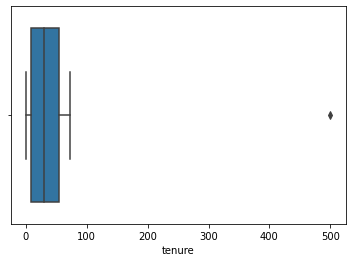

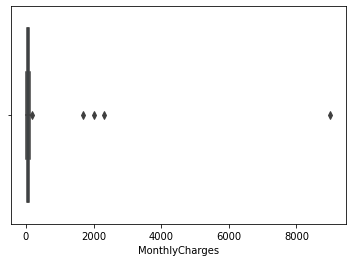

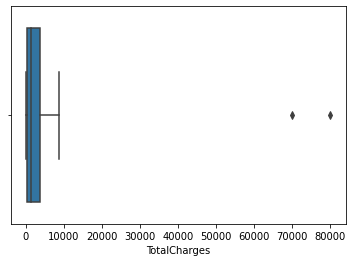

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

# Handle Outlier

In [124]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     170.45625
TotalCharges      8864.95000
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -44.49375
TotalCharges     -4673.85000
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7070.000000     7070.000000   7070.000000
mean     32.376379       64.977649   2282.880764
std      24.573820       30.095452   2265.515374
min       0.000000        0.000000     19.000000
25%       9.000000       36.112500    403.200000
50%      29.000000       70.425000   1398.250000
75%      55.000000       89.850000   3787.900000
max     124.000000      170.456250   8864.950000


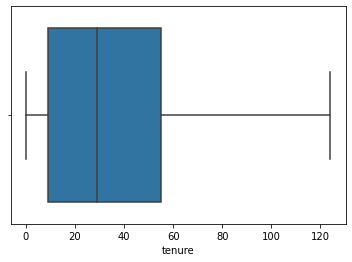

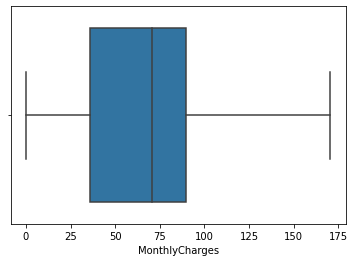

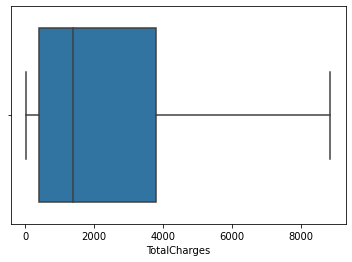

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

# Mendeteksi Nilai yang tidak Standar

In [150]:
# for col_names in list(df_load.columns):
#     if df_load[col_names].dtype != np.number:
#         print(df_load[col_names].value_counts())

In [149]:
# Masukkan variable
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3559
Female       3491
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5922
1    1148
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3657
Yes    3413
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4951
Yes    2099
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6386
No      684
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3404
Yes                 2982
No phone service     684
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3108
DSL            2429
No             1533
Name: InternetService, dtype: int64

Unique Values Count Befor

# Menstandarisasi Variable Kategorik

In [151]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

In [153]:
# Masukkan variable
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3565
Female    3505
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4951
Yes    2119
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5195
Yes    1875
Name: Churn, dtype: int64
